In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#产生2维数据点,作为分类的数据
def gen2dPoints():
    x = np.array([[12, 20, 28, 18, 10, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 23],
                  [39, 36, 30, 52, 54, 20, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 77]])
    return x

In [12]:
#初始随机得到类心
def initCenters(x,k):
    xlen = x.shape[1]
    idx_centers = np.random.choice(xlen,k,replace = False)
    centers = x[:,idx_centers]
    return centers

In [38]:
#计算与现有的i个类心的最小距离
def getMinDistance2(x,centers,k):
    xlen = x.shape[1]
    distance = np.zeros((k,xlen))
    dx2 = np.zeros((1,xlen))
    for i in range(k):
        distance[i] = np.sum((x-np.expand_dims(centers[:,i],axis = 1))**2,axis = 0)
    dx2 = np.min(distance,axis=0,keepdims = True)
    return dx2
#采用Kmeans++的方式得到初始的k个类心
def getCenters(x,k):
    xlen = x.shape[1]
    centers = np.zeros((2,k))
    idx = np.random.choice(xlen)
    centers[:,0] = x[:,idx]#随机选择一个样本作为第一个类心
    for i in range(1,k):
        dx2 = getMinDistance2(x,centers,i)
        dx2Sum = np.sum(dx2)
        #采用轮盘法得到下一个类心
        randk = dx2Sum*np.random.random()
        for j in range(xlen):
            randk -= dx2[0,j]
            if randk<=0:
                centers[:,i] = x[:,j]
                break
    return centers 

In [4]:
#根据当前类中心,标记样本归属哪个类别
def lablePoints(x,centers):
    xlen = x.shape[1]
    k = centers.shape[1]
    lable = np.zeros((1,xlen),dtype = np.uint32)
    distance = np.zeros((3,xlen))
    for i in range(k):
        distance[i,:] = np.sum((x-np.expand_dims(centers[:,i],axis = 1))**2,axis = 0)
    for i in range(xlen):
        minl2 = distance[0,i]
        minid = 0
        for j in range(1,k):
            if distance[j,i]<minl2:
                minl2 = distance[j,i]
                minid = j
        lable[:,i] = minid
    return lable

In [5]:
#根据当前样本分类,从新计算类中心
def updateCenters(x,lable,k):
    centers = np.zeros((x.shape[0],k))
    idx = np.squeeze(lable)
    x0 = x[:,idx == 0]
    x1 = x[:,idx == 1]
    x2 = x[:,idx == 2]
    centers[:,0] = np.mean(x0,axis = 1)
    centers[:,1] = np.mean(x1,axis = 1)
    centers[:,2] = np.mean(x2,axis = 1)
    return centers

In [49]:
#运行k-means算法
def runKmeans(x,k,centers):
    xlen = x.shape[1]
    lable = lablePoints(x,centers)
    centersNew = updateCenters(x,lable,k)
    while True:
        centers = centersNew
        lable = lablePoints(x,centers)
        centersNew = updateCenters(x,lable,k)
        if np.array_equal(centers,centersNew):#当类心不再变化时,迭代结束
            break
    return lable,centers

In [88]:
def main():
    k = 3
    x = gen2dPoints()
    #kmeans算法
    initcenters = initCenters(x,k)#随机选择k个不同的样本作为类心
    lable,centers = runKmeans(x,k,initcenters)
    #绘图
    xlen = x.shape[1]
    color = np.array(['r' for _ in range(xlen)])
    idx = np.squeeze(lable)
    color[idx==1] = 'g'
    color[idx==2] = 'b'
    #画出最终分类结果
    plt.scatter(x[0],x[1],c = color)
    plt.axis([0,80,0,80])
    #画出最初类心,用以和kmeans++进行比较
    plt.scatter(initcenters[0,0],initcenters[1,0],c='r',marker='s',linewidths=4)
    plt.scatter(initcenters[0,1],initcenters[1,1],c='g',marker='s',linewidths=4)
    plt.scatter(initcenters[0,2],initcenters[1,2],c='b',marker='s',linewidths=4)
    #画出最终类心,用向上三角表示
    plt.scatter(centers[0,0],centers[1,0],c='r',marker='^',linewidths=4)
    plt.scatter(centers[0,1],centers[1,1],c='g',marker='^',linewidths=4)
    plt.scatter(centers[0,2],centers[1,2],c='b',marker='^',linewidths=4)
    plt.show()
    
    #kmeans++算法
    initcenters = getCenters(x,k)#采用Kmeans++改良的方法选择k个不同的样本作为类心
    lable2,centers2 = runKmeans(x,k,initcenters)
    #绘图
    xlen = x.shape[1]
    color2 = np.array(['r' for _ in range(xlen)])
    idx2 = np.squeeze(lable2)
    color2[idx2==1] = 'g'
    color2[idx2==2] = 'b'
    plt.scatter(x[0],x[1],c = color2)
    plt.axis([0,80,0,80])
    #画出最初类心,用以和kmeans进行比较
    plt.scatter(initcenters[0,0],initcenters[1,0],c='r',marker='s',linewidths=4)
    plt.scatter(initcenters[0,1],initcenters[1,1],c='g',marker='s',linewidths=4)
    plt.scatter(initcenters[0,2],initcenters[1,2],c='b',marker='s',linewidths=4)
    #画出最终类心,用向上三角表示
    plt.scatter(centers2[0,0],centers2[1,0],c='r',marker='^',linewidths=4)
    plt.scatter(centers2[0,1],centers2[1,1],c='g',marker='^',linewidths=4)
    plt.scatter(centers2[0,2],centers2[1,2],c='b',marker='^',linewidths=4)
    plt.show()

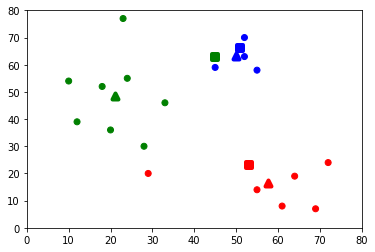

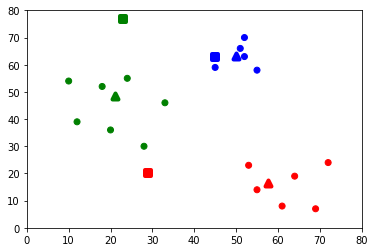

In [96]:
if __name__ == '__main__':
    main()

### 结论

上面两幅图像中,方形代表初始类心,三角形代表最终的类心.比较可以发现,Kmeans++算法通过距离已有类心越远,被选择作为下一个类心的概率更大的方式选择初始的类心.这种方式相比与kmeans算法一定程度上能够减低由于初始类心选择不当,导致分类结果不理想的情况,但这一问题并没有在Kmeans++中得到根除,由于同样在初始类心选择上包含概率性,导致聚类的结果依然具有不确定性.